# 1. General analytics section

First, and foremost I watched analytics section.


## Macro analysis
Dynamic of ether balance is shown below.

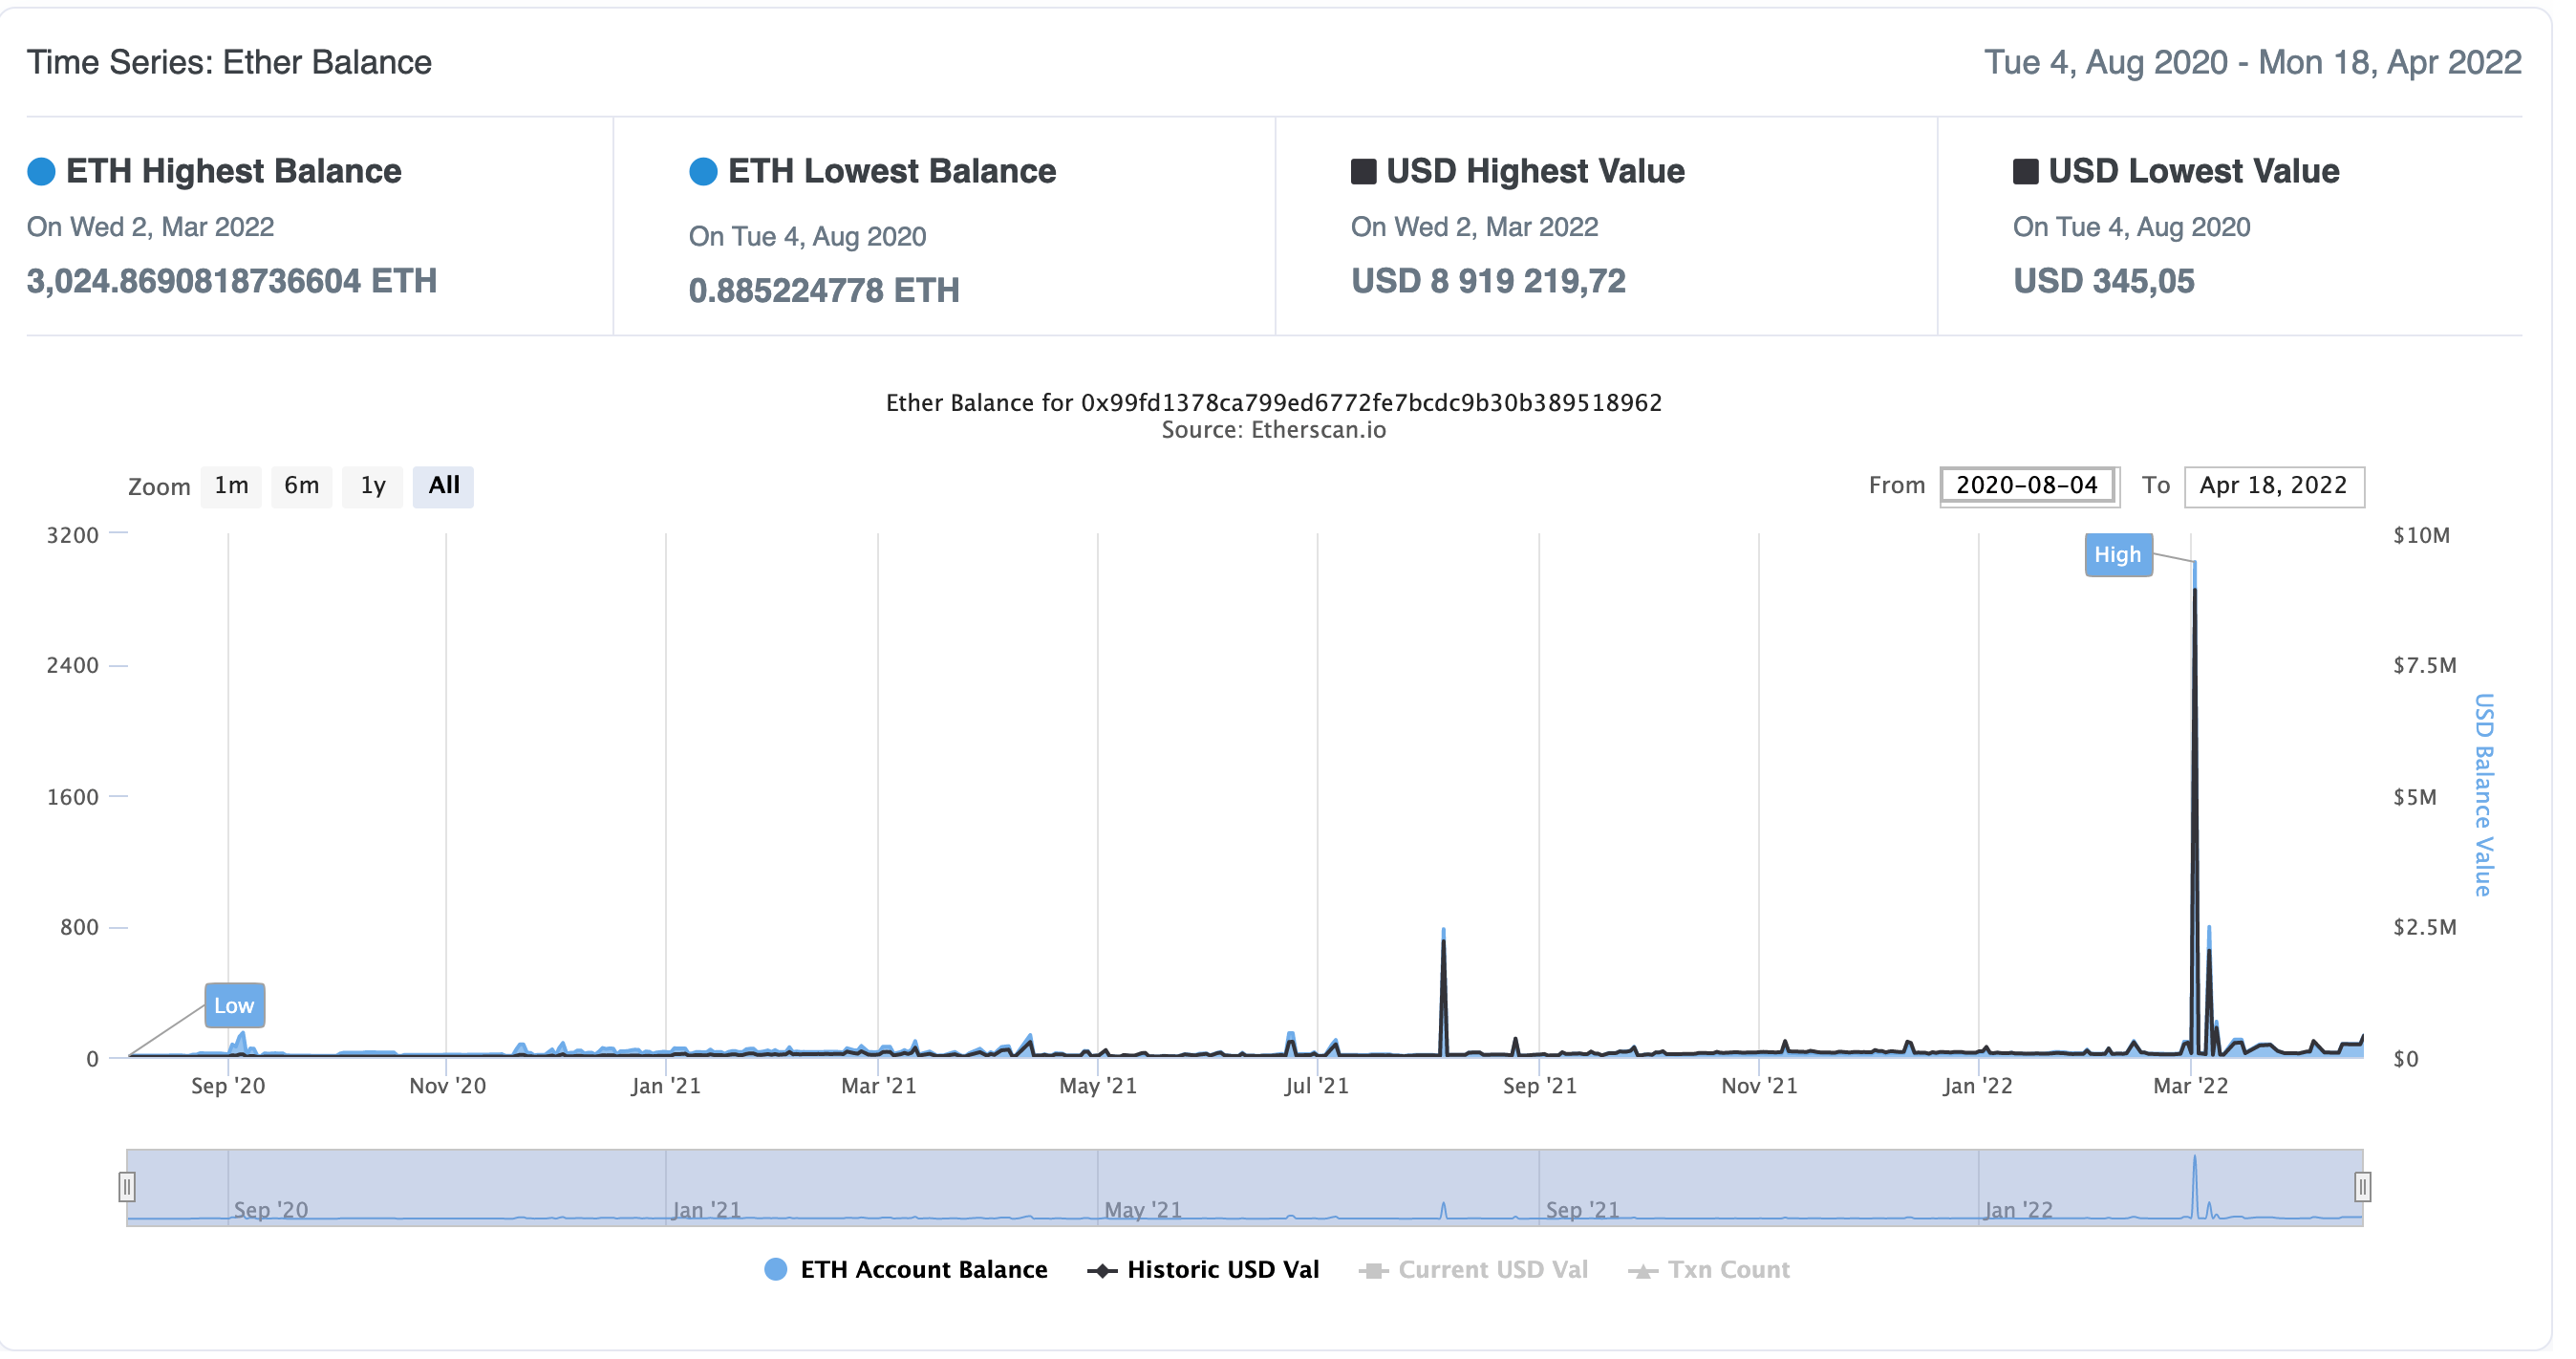

We see that the first replenishment of balance was in August, 4 in 2020 and last transaction was on 18 April, 2022. The maximum balance was achieved on March, 2022. This user incredible increased his balance at the begining of the March. I suspect it could be related with russian special war operation which officially started at 24 February, 2022. But this hypothesis are needed in checking.

The next step is analysing of transactions dynamic, which is introduced in the plot below.

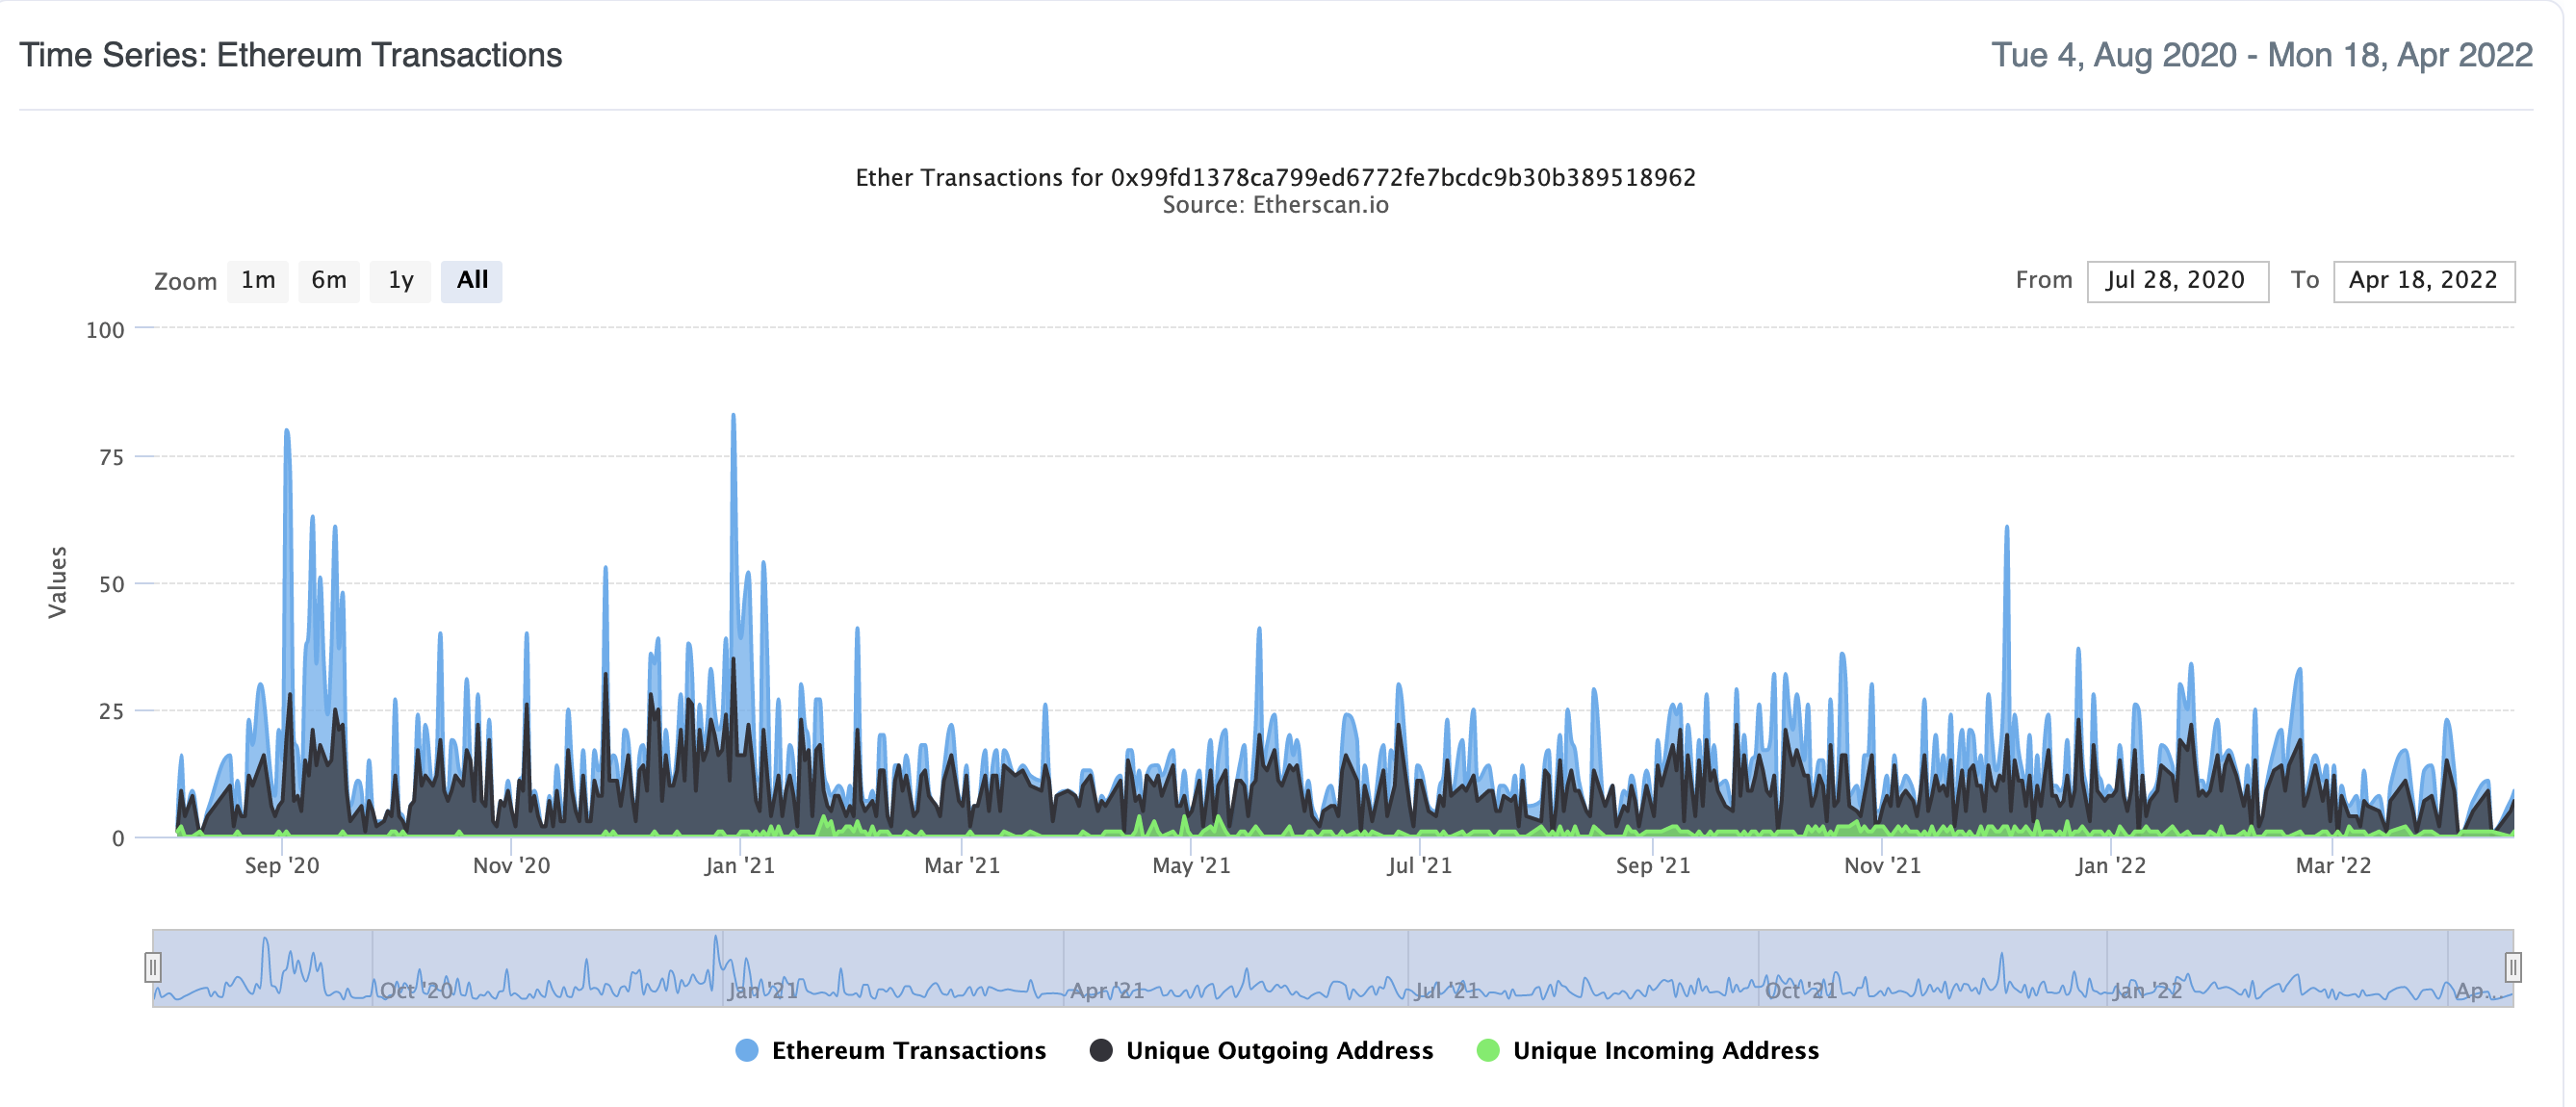

We can observe that the most frequent transaction periods were periods with the lowest balance.
Total amount of transactions is 7514.

Next step is analysis of the transfers both for ethers and tokens.

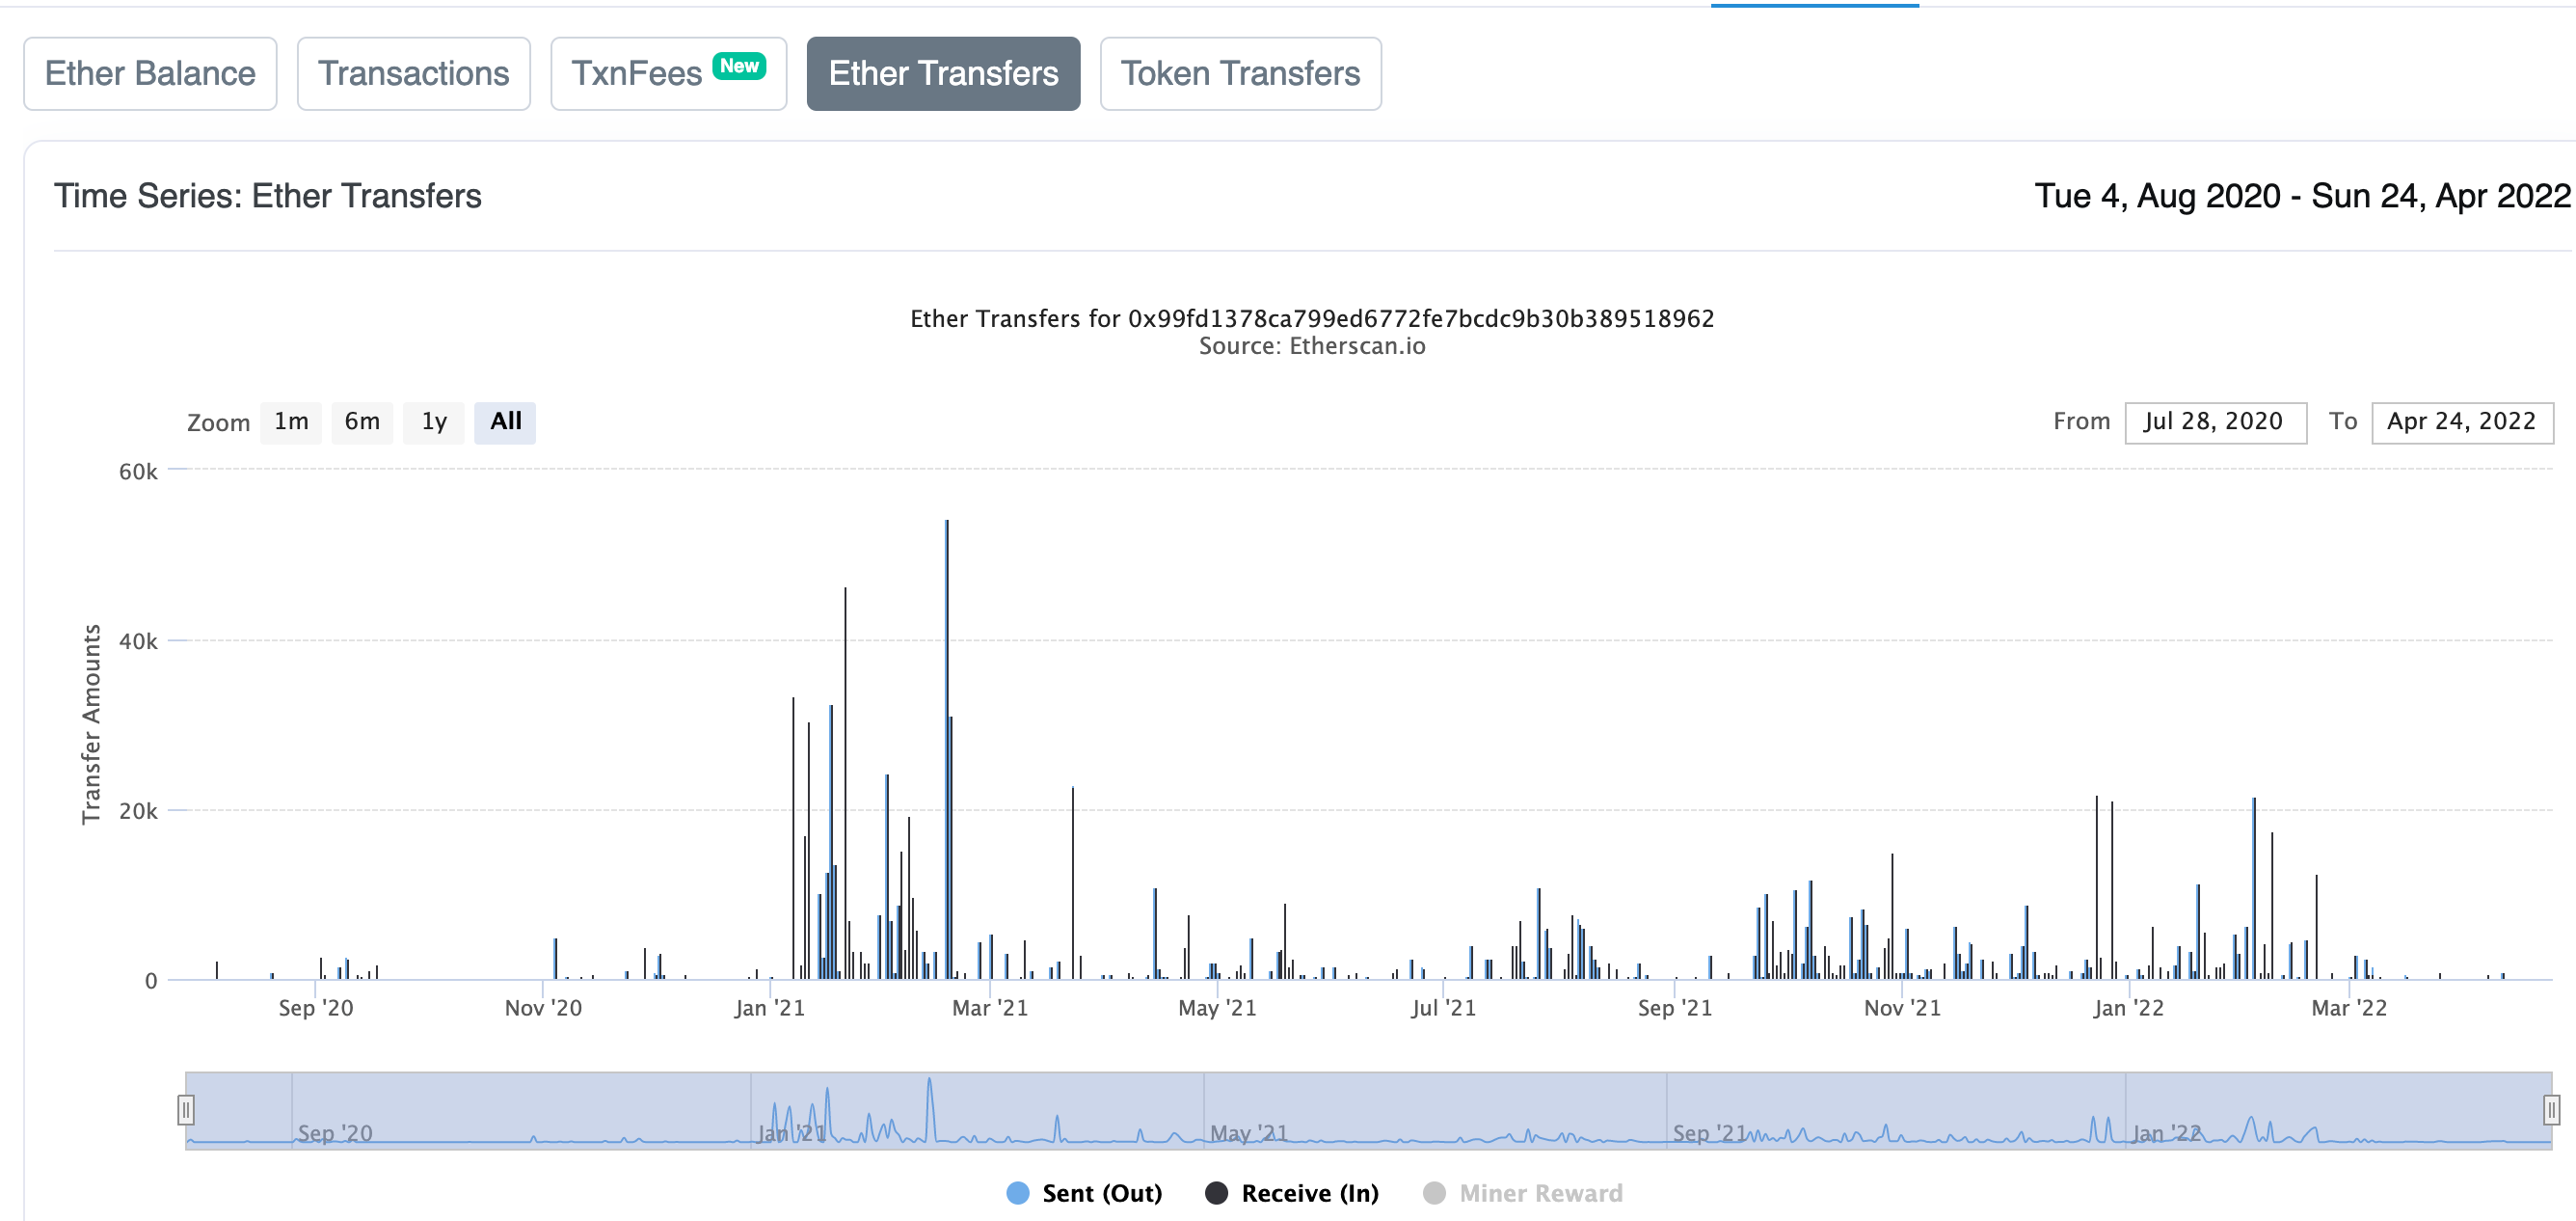

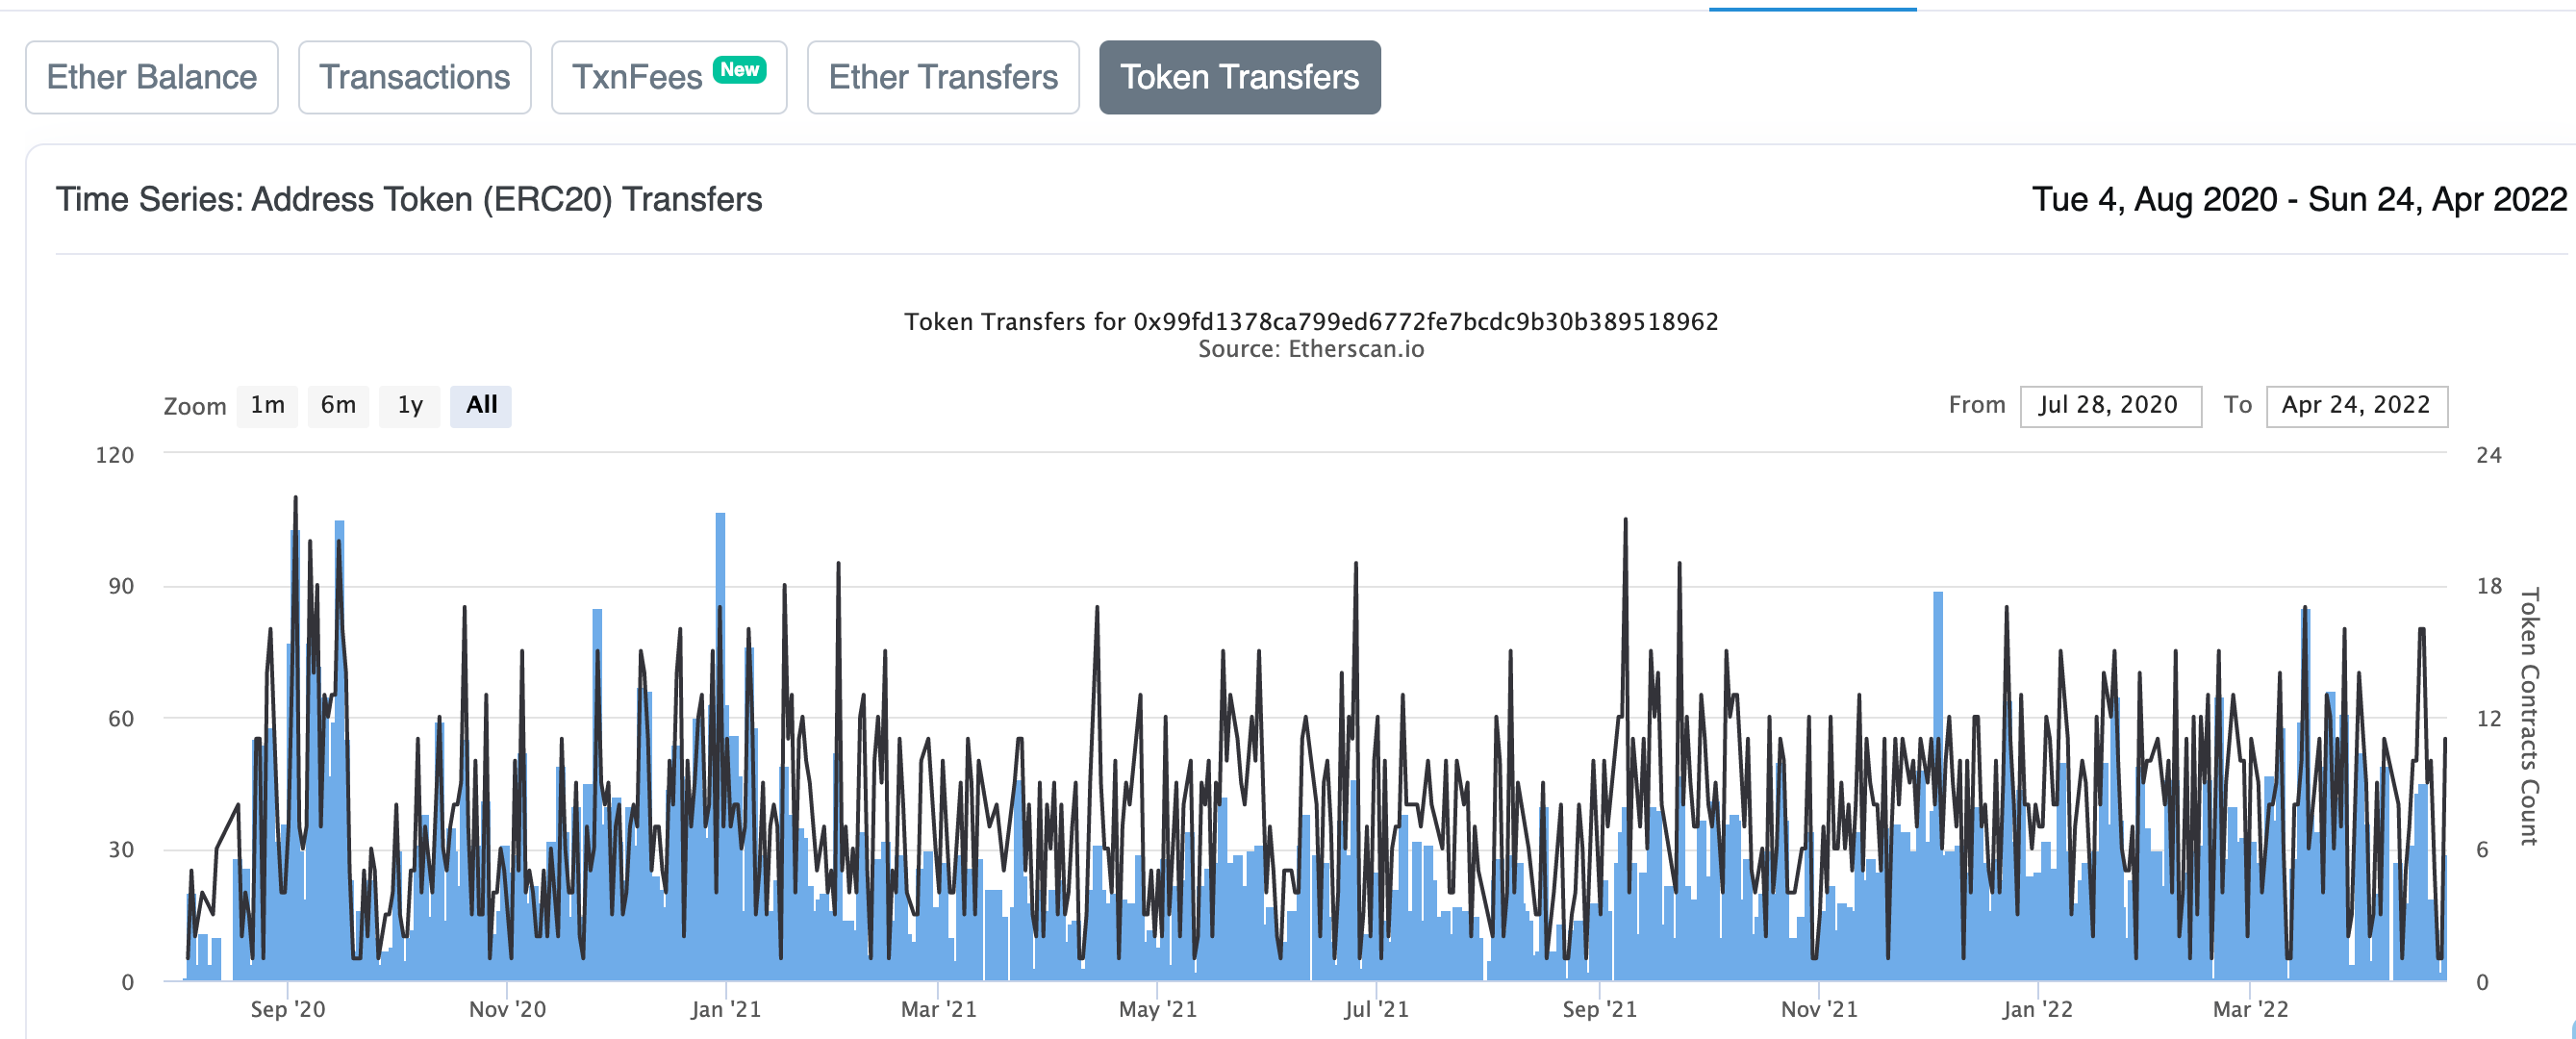

These two plots above show that user was more active in token transfers that ether transfers.

## Token activity

General user's token activity could be researched [here](https://etherscan.io/tokenholdings?a=0x99fd1378ca799ed6772fe7bcdc9b30b389518962)

Net worth in USD on 27 April is more than 130 mln dollars that equivalent to 45603 ETH. All this assets are in wallet.

Picture below shows the main tokens user has by 27 April 2022.

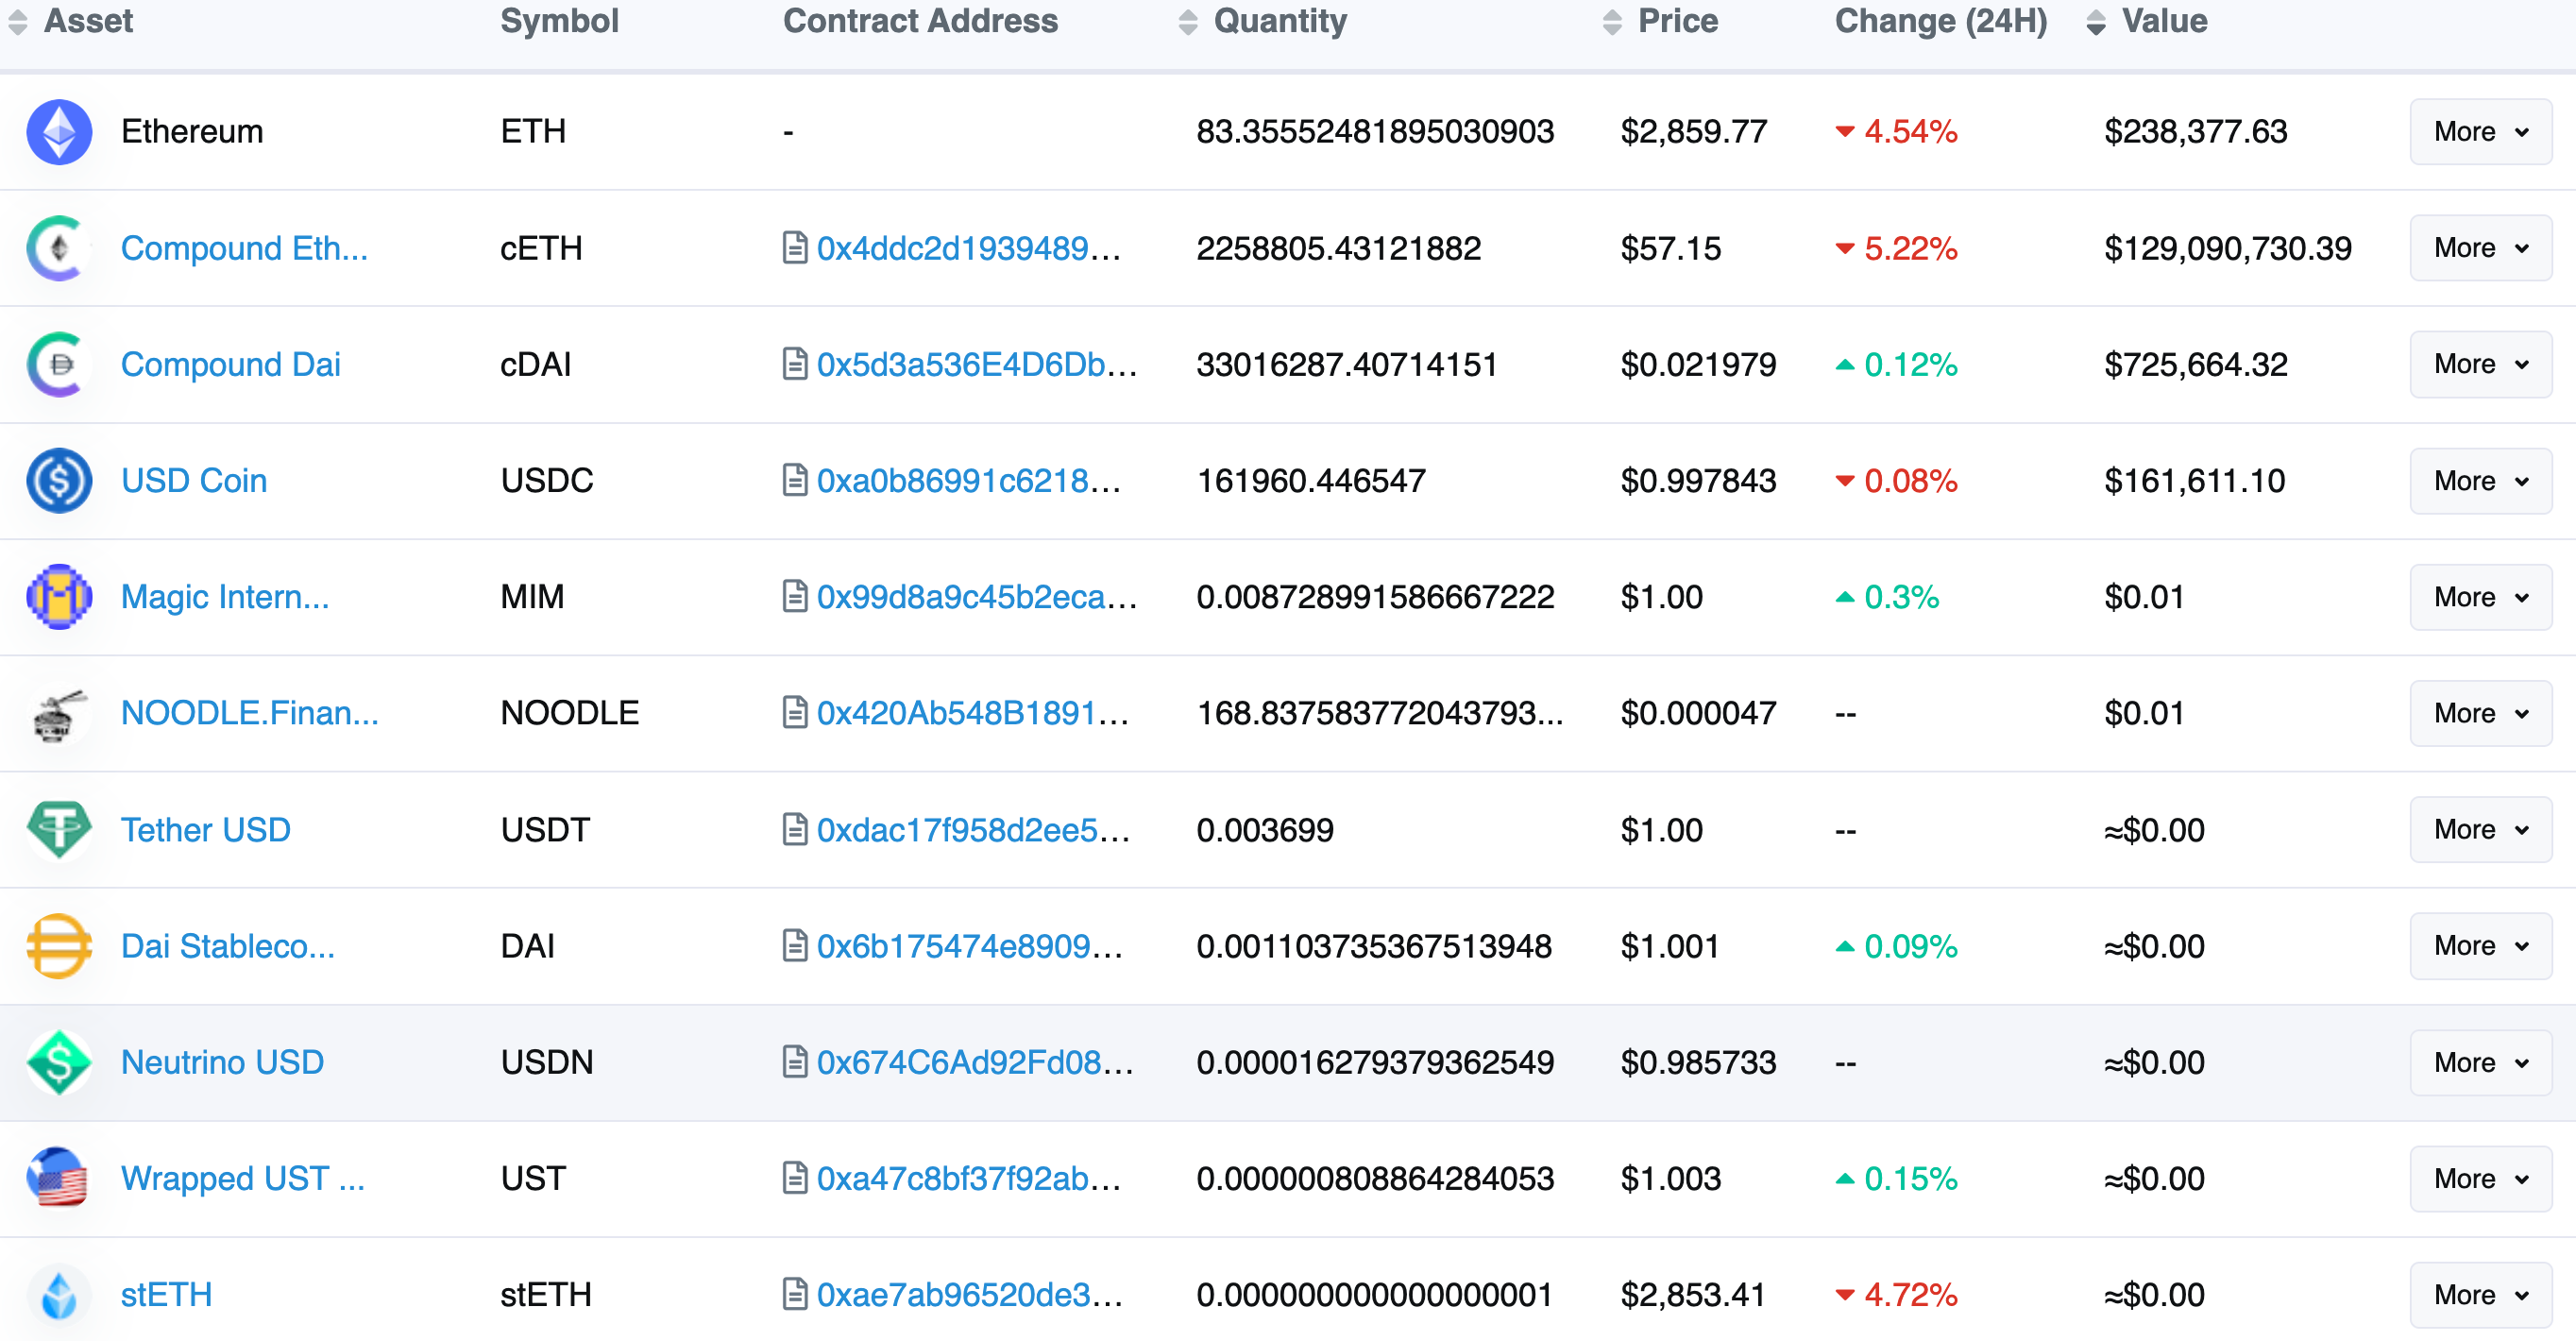

Obviously, cETH (compound Ethereum) is the main token user has - more than 99% of token USD value belongs to it. Compound is an algorithmic money market protocol on Ethereum which are used for earning interest or borrow assets against collateral. Except compound tokes use preferes to invest in stable coins like USDC, MIM, USDT, DAI, USDN, UST.

# 2. Download data

Before start analysing of user behavior, we must download all data we need. Firstly, I downloaded two .csv files with all historical transactions for this user. Etherscan provides only last 5000 observations. Due to user made approximately 7.5k transactions, I downloaded two .csv files.

After general transaction I needed to import transactions with tokens, because it's main activity for that user. Transactions with token I downloaded from [here](https://etherscan.io/tokenholdings?a=0x99fd1378ca799ed6772fe7bcdc9b30b389518962).
Prices for cETH and cDAI I downloaded from [here](https://coincodex.com/).
Prices for stablecoins are 1 USD.

Therefore, I manually downloaded a few files which I saved in data/ folder.

However, I encountered with problem that not all information about ETH and token flows are reflected in these files. For example, I can't following all balance changing in Ethereum for this user because all information contains in transaction's page but not all page with all transactions.

Let's see on this screenshot for transaction 0x857a2867ed34dae08d171e6fe0061e63cc49ec794179acdc2d2040f678861a03:

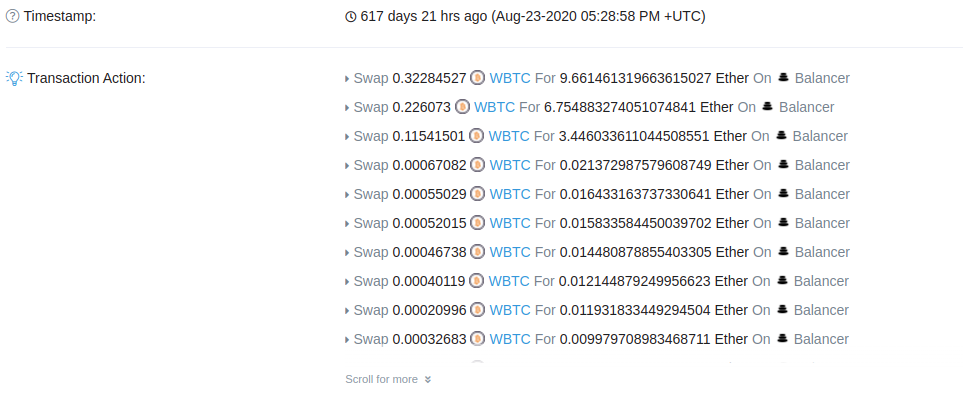

Here we see that user actively swapped WBTC on WETH. But this information are not reflected here:

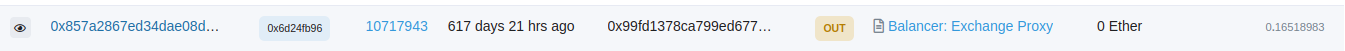

That is why I made a decision parsed all token operations in order to research transactions and strategies more deeply. 

However, I did not find a way to track Ethereum changes (as in analytics section in etherscan). One of the main reason for that - possible rebalancing of active in liquidity pool as, at the same time, user stores LP tokens

In [1]:
import re
%load_ext autoreload
%autoreload 2
%aimport

import pandas as pd
import numpy as np
import plotly.express as px

from application.load_transaction_data import load_ether_data, load_token_data, load_transaction_token_df

# Token names-hash
token_names_df = pd.read_pickle("data/token_hash_name")

# General transactions data
transactions_df = load_ether_data().query("Status != 'Error(0)'")

# Short token data
token_df = load_token_data()

# Token transactions with ETH transfers
transactions_transfers_df = load_transaction_token_df(transactions_df)

Modules to reload:
all-except-skipped

Modules to skip:



## Total tokens value in USD

In [2]:
px.line(token_df['Value_USD'].resample("D").sum().cumsum())

Graph above shows that we can highlight four period:
1. Sep 2020 - Apr 2021. Value of tokens in USD was quite low comparing with all periods.
2. May 2021 - Sep 2021. Value of tokens in USD reached almost historical peak and afterwards returned to zero.
3. Oct 2021 - Jan 2022. Value of tokens in USD was about around 0-50 mln dollars that correspondence with minimal historical period.
4. Feb 2022 - Now. User incredibly increased his tokens in USD.

Therefore, I suspect that user could have minimum 4 different strategies across all historical period.

Lets' start with period Feb 2022 - nowadays.

# 3. Feb 2022 - nowadays

In [3]:
# Merge with ETHER transactions
token_ether_df = pd.concat([token_df\
                           .drop(columns=['Date', 'Volume', 'Market Cap', 'UnixTimestamp'])\
                           .reset_index()
                            ,
                            transactions_df\
                            .drop(columns=['ErrCode', 'TxnFee(USD)', 'Status',
                                           'Value_OUT(ETH)', 'Value_IN(ETH)'])
                            .rename(columns={"Historical $Price/Eth": 'Price'})\
                            .assign(token="Ether")\
                            .query("Quantity != 0")
                            ]).sort_values("DateTime")
token_ether_df

DateTime                                             Txhash  \
0    2020-08-04 20:21:33  0x4c3b415bb98370a9ef572567a4e13b61759763c08192...   
1    2020-08-04 20:26:40  0xdf08f1b6048a3c151737d797c5a5da5892cff66dfdfd...   
0    2020-08-04 20:26:40  0xdf08f1b6048a3c151737d797c5a5da5892cff66dfdfd...   
2    2020-08-05 18:14:02  0x88877e0aff3d534341cbb11d9fa19e5c807a164efd3f...   
4    2020-08-05 19:01:33  0x12c77d689b0a62785e4ab18999382e8ce24c2b927bad...   
...                  ...                                                ...   
2526 2022-04-24 00:36:05  0x3f47026093d13668760dc35418cb4983b374e9ebdc5a...   
3537 2022-04-24 00:36:21  0x2e2926cccdc525856f0aa64e70917ffbec4a02f557f1...   
3538 2022-04-24 00:38:04  0x167c46dd943aa9ff360ff99fbf2683fc6e78c377f472...   
2531 2022-04-24 12:20:07  0xb7e6d1118f9b99cf1575d55dcefbee3b013b72e732b2...   
3539 2022-04-24 12:21:42  0x41e57623f6c0d31994a0466cfac089c64bbb135719a5...   

       Blockno                                        From  \
0     10595414  0x04045a6c0a9f6ece044510c51b974400ade3ca5b   
1     10595437                                        user   
0     10595437  0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81   
2     10601283  0x04045a6c0a9f6ece044510c51b974400ade3ca5b   
4     10601518                              FTX Exchange 2   
...        ...                                         ...   
2526  14644314                                        user   
3537  14644315                       Compound: cUSDT Token   
3538  14644327                                        user   
2531  14647406                              FTX Exchange 2   
3539  14647418  0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2   

                                              To      Quantity         Method  \
0                                           user  1.000000e+00       Transfer   
1     0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81 -1.000000e-01     0x4e7ffa04   
0                                           user  3.912624e+01              -   
2                                           user  9.156451e+00       Transfer   
4                                           user  2.228527e+03       Transfer   
...                                          ...           ...            ...   
2526                        Compound: cETH Token -1.120859e+02           Mint   
3537                                        user  3.000000e+06         Borrow   
3538          Curve.fi: cyDAI/cyUSDT/cyUSDC Pool -3.366310e+06  Add_liquidity   
2531                                        user  4.589402e+01       Transfer   
3539                                        user  1.619604e+05       Transfer   

          token    Price     Value_USD  CurrentValue @ $2834.95/Eth  \
0         Ether   389.79  3.897900e+02                 2.834950e+03   
1         Ether   389.79 -3.897900e+01                 2.834950e+02   
0          USDC     1.00  3.912624e+01                          NaN   
2         Ether   401.12  3.672836e+03                 2.595808e+04   
4         Ether   401.12  8.939067e+05                 6.317762e+06   
...         ...      ...           ...                          ...   
2526      Ether  2922.37 -3.275564e+05                 3.164498e+05   
3537  TetherUSD     1.00  3.000000e+06                          NaN   
3538  TetherUSD     1.00 -3.366310e+06                          NaN   
2531      Ether  2922.37  1.341193e+05                 1.295717e+05   
3539       USDC     1.00  1.619604e+05                          NaN   

      TxnFee(ETH)  
0        0.000882  
1        0.014775  
0             NaN  
2        0.001050  
4        0.000983  
...           ...  
2526     0.003387  
3537          NaN  
3538          NaN  
2531     0.000553  
3539          NaN  

[4323 rows x 12 columns]

Main method for receiving ETH in this period - *transfer* - 100% of all incoming transactions were produced by this method. (base analytics in dashboard)
<img src="screenshots/Screenshot1.png">



Main senders were FTX Exhange 2 (more than 50% of total) and these two users:

0x2a67035357C3045438F3A92E46870a9E48e5AAB7 (suspected_user1)

0x937cdc9e86ba06aa5aaea221017a1d9fc7f59efd (suspected_user2)

I suspect that these two accounts could also belong to user.

The two main methods for receiving ETH were Mint (almost 2/3) and Repay Behalf (more than 1/4). These methods are included more than 75% of all outgoing transactions with Ethereum.

Apparrently, that choice of main tokens for investing dependent on two main methods above. Accordingly, two main receivers were Compound ETH token and Compound: Contract 1.

Therefore, this brief descriptive statistics allows to make a first conclusion - during the period of Feb 2022 to nowadays, our user has been trying to ***invest his own ETH to Compound Token to earn interest.***. Notice, that he has been receiving ETH from another blockchain via exchange market. Also I make an attempt to assume that *he have been doing cyclic staking - stakes his ethers in Compound, then puts them as collateral for a loan of stablecoins, then uses stablecoins in DeFi, but in another blockchain, where the yield is higher*.

The Compound Protocol is a series of interest rate markets running on the Ethereum blockchain. When users and applications supply an asset to the Compound Protocol, they begin earning a variable interest rate instantly. Interest accrues every Ethereum block (currently ~13 seconds), and users can withdraw their principal plus interest anytime.

To check hypothesis above, we should analyse token moving more deeply (token analytics in dashboard)

<img src="screenshots/Screenshot2.png">

This plot demonstrates that user was steadily growing up his token value in USD.


The main incoming methods with tokens were related to borrowing, minting, removing liquidity and transfering.

<img src="screenshots/Screenshot3.png">


The main outgoing methods with tokens were related to repaying debts, adding liquidity, exchanging underlying assets (ETH).

This statistics can approve hypothesis that user has been earning money on lending staiblecoins (ETH as collateral) in  Ethereum blockchain to invest in DeFi in more profitable blochchains. Afterwards, he can return money to Ethereum blockchain and repeat this schema again. 

In [ ]:
More deeply token data also speaks that user invested crypto money in Terra USD ( UST (Wormhole)). It also accepts hypothesis that user finded earnings in another blockchain with much more profitability that in ethereum.

<img src="screenshots/Screenshot4.png">

# 4. Oct 2021 - Jan 2022

<img src="screenshots/Screenshot5.png">




Here we see that user has been using another strategy - adding liquidity to Pool and borrowing ETH via Compound contract. Instead of staiblecoind, user invested in different Pools: *Curve Finance: 3Pool Deposit Zap*, *Curve.fi: DAI/USDC/USDT Pool*, *Curve.fi: cyDAI/cyUSDT/cyUSDC Pool* and etc.  

The yVault Zap In adds liquidity to V1 and V2 Vaults. 

Incoming transfers were also from FTX Exchange and two suspected users. It means that user also rotates money via external blockchains.

Token analysing allows to accept hypothesis that user did not buy stabelecoins in much amount during this period. Plot below shows that  share of *Mint* was less than 10% and almost all operations with token were related to liquidity (*Zap In*) and repayment of debt after borrowing (Repay Behalf)

<img src="screenshots/Screenshot6.png">

*Curve Finance: 3Pool Deposit Zap* was the main address for user during this period.

# 5. May 2021 - Sep 2021



<img src="screenshots/Screenshot7.png">

Plot above demostrates that main methods were *Mint*, *Transfer* and *Zap In*. That is why I suppose that user has been using mix strategy - add liquidity, buy stablecoins using Compound contract. Almost 1/3 of ETH user transfered back.  

# 4. Oct 2021 - Jan 2022

<img src="screenshots/Screenshot5.png">




Here we see that user has been using another strategy - adding liquidity to Pool and borrowing ETH via Compound contract. Instead of staiblecoind, user invested in different Pools: *Curve Finance: 3Pool Deposit Zap*, *Curve.fi: DAI/USDC/USDT Pool*, *Curve.fi: cyDAI/cyUSDT/cyUSDC Pool* and etc.  

The yVault Zap In adds liquidity to V1 and V2 Vaults. 

Incoming transfers were also from FTX Exchange and two suspected users. It means that user also rotates money via external blockchains.

Token analysing allows to accept hypothesis that user did not buy stabelecoins in much amount during this period. Plot below shows that  share of *Mint* was less than 10% and almost all operations with token were related to liquidity (*Zap In*) and repayment of debt after borrowing (Repay Behalf)

<img src="screenshots/Screenshot6.png">

*Curve Finance: 3Pool Deposit Zap* was the main address for user during this period.

# 5. May 2021 - Sep 2021



<img src="screenshots/Screenshot7.png">

Plot above demostrates that main methods were *Mint*, *Transfer* and *Zap In*. That is why I suppose that user has been using mix strategy - add liquidity, buy stablecoins using Compound contract. Almost 1/3 of ETH user transfered back.  